In [1]:
import sys
sys.path.append('../../')
from src.util.config import Config

In [2]:
# parameter mechanism
bidder = ['1', '1']
o_space = {'1': [1, 1.4]}
a_space = {'1': [[1.0 ,2.5], [0.3 ,1.2]]}

param_prior= {
    'distribution':'uniform', 
    'mu': 1.2, 
    'sigma': 0.1}


param_util ={
    'tie_breaking': 'lose',
    'payment_rule': 'first_price',
    'scale': 0.3,
            }

# parameter approximation game
n = 32
m = 32

config = Config()
config.create_config_game("split_award", bidder, o_space, a_space, param_prior, param_util, n, m)
game = config.create_game()
game.get_utility()

**Learner**
Specify Learning Algorithm

In [20]:
# parameter learner
max_iter = int(2e3)
tol = 1e-5
stop_criterion = 'util_loss'
param_learner = {
    "regularizer": "euclidean",
    "mirror_map": "euclidean",
    "steprule_bool": True,
    "eta": 0.5,
    "beta": 0.05,
}
config.create_config_learner("soma", max_iter, tol, stop_criterion, param_learner)
learner = config.create_learner()

Run Learning Algorithm

Here we initialize the strategies near the WTA-Equilibrium, which turns out not to be attracting here.

In [21]:
x = game.o_discr['1']
bne_wta = game.mechanism.equilibrium_wta('1', x)

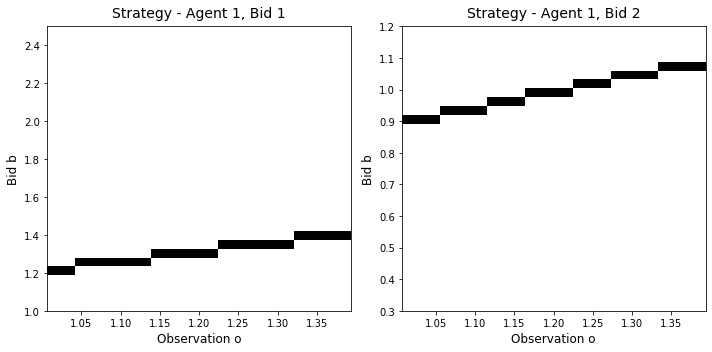

In [22]:
#create and initialize strategies
strategies = config.create_strategies(game, "function", {"init_function": bne_wta})
strategies['1'].plot()

In [23]:
# run learn algorithm
learner.run(game, strategies, disable_tqdm_bool=False, print_result_bool=True, save_history_bool=True)

100%|████████████████████| 2.00k/2.00k [01:51<00:00, 17.9it/s]

No convergence with stopping criterion
Current value of (util_loss): 0.07051
Best value of (util_loss)   : 0.01077)


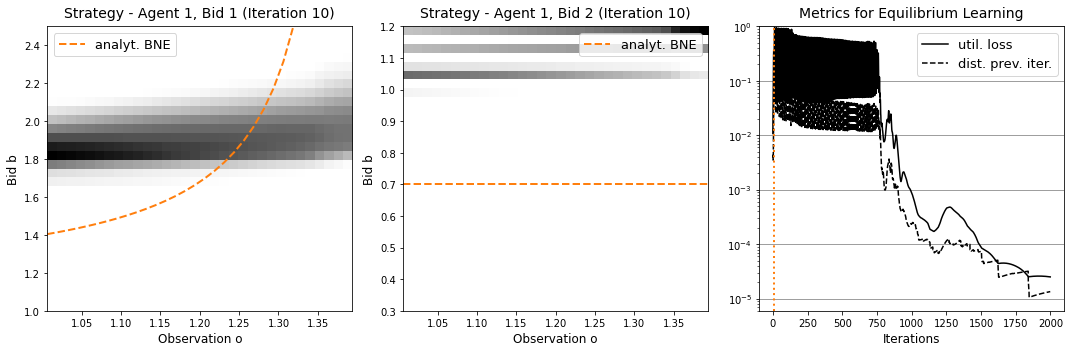

In [19]:
agent = '1'
bne = game.mechanism.get_bne('1', strategies[agent].o_discr)
strategies[agent].plot(metrics=True, grad=False, beta=bne, iter=10)